In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os

In [2]:
# Define a function to extract metrics from a single file
def extract_metrics(filename):
    metrics = {}
    with open(filename, 'r') as file:
        lines = file.readlines()
    
    for line in lines:
        # Strip whitespace from the line and check if it's not empty
        line = line.strip()
        if not line:
            continue
        
        # Find the position of the last equals sign
        last_equals_index = line.rfind('=')
        if last_equals_index == -1:
            continue
        
        # Extract the metric name and value
        metric_name = line[:last_equals_index].strip()
        metric_value = line[last_equals_index + 1:].strip()
        
        # Convert the value to float if possible
        try:
            metric_value = float(metric_value)
            metrics[metric_name] = metric_value
        except ValueError:
            continue
    
    return metrics

In [12]:
# Define the experiments parameters
crops = [256, 400, 600, 800]
datasets = ['initial', 'transfer']

# Initialize an empty DataFrame
all_metrics = []

# Iterate over all combinations of crops and datasets
for crop in crops:
    for dataset in datasets:
        # Construct the filename based on the crop and dataset
        filename = f'/workspace/detr_output_{crop}_binary_skip_ep500/coco_eval_output_{dataset}_data.txt'
        # Extract metrics
        metrics = extract_metrics(filename)
        metrics['crop'] = crop
        metrics['dataset'] = dataset
        
        # Append metrics to the DataFrame
        all_metrics.append(metrics)

# Convert the list of metrics to a DataFrame
results_df = pd.DataFrame(all_metrics)
results_df.drop(columns=[
        'Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ]',
       'Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ]',
       'Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ]',
       'Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ]',
       'Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ]',
       'Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=100 ]'],
                inplace=True)
        
# Print the DataFrame to check its structure
results_df.columns


Index(['Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ]',
       'Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ]',
       'Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ]',
       'Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ]',
       'Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ]',
       'Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ]',
       'crop', 'dataset'],
      dtype='object')

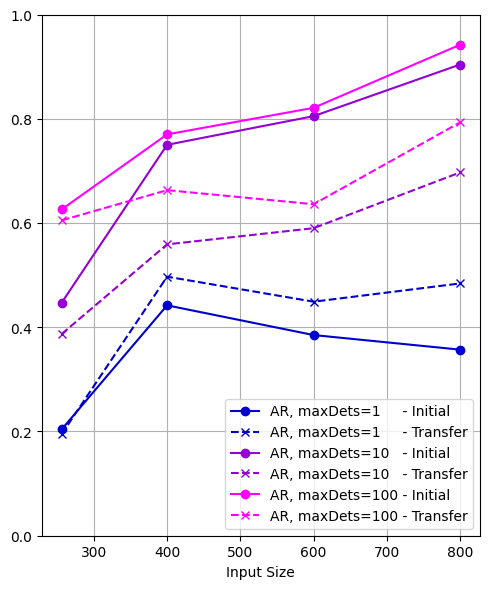

In [13]:
color_dict = {
    # 'Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ]':'red',
    # 'Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ]':'orange',
    # 'Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ]':'yellow',
    'Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ]':'mediumblue',
    'Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ]':'darkviolet',
    'Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ]':'magenta'
}

name_dict = {    
    'Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ]':'AP @ IoU=0.50:0.95',
    'Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ]':'AP @ IoU=0.50     ',
    'Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ]':'AP @ IoU=0.75     ',
    'Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ]':'AR, maxDets=1    ',
    'Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ]':'AR, maxDets=10  ',
    'Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ]':'AR, maxDets=100'}
    
symbol_dict = {'initial':'o','transfer':'x'}
style_dict = {'initial':'solid','transfer':'dashed'}
plt.figure(figsize=(5, 6))
for metric in color_dict.keys():
    for dataset in datasets:
        dataset_df = results_df[results_df['dataset'] == dataset]
        crop_df = dataset_df[dataset_df['crop'] == crop]
        plt.plot(dataset_df['crop'], dataset_df[metric], marker=symbol_dict[dataset], linestyle=style_dict[dataset], color=color_dict[metric], label=f'{name_dict[metric]} - {dataset.capitalize()}')


plt.xlabel('Input Size')

plt.ylim(0,1)

plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('/workspace/visualizations/recall.png')

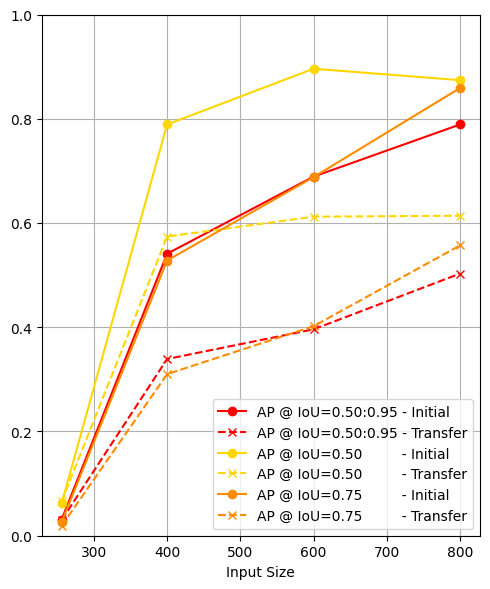

In [14]:
color_dict = {
    'Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ]':'red',
    'Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ]':'gold',
    'Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ]':'darkorange',
#    'Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ]':'blue',
#    'Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ]':'green',
#    'Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ]':'turquoise'
}

name_dict = {    
    'Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ]':'AP @ IoU=0.50:0.95',
    'Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ]':'AP @ IoU=0.50        ',
    'Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ]':'AP @ IoU=0.75        ',
    'Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ]':'AR, maxDets=1  ',
    'Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ]':'AR, maxDets=10 ',
    'Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ]':'AR, maxDets=100'}
    
symbol_dict = {'initial':'o','transfer':'x'}
style_dict = {'initial':'solid','transfer':'dashed'}
plt.figure(figsize=(5, 6))
for metric in color_dict.keys():
    for dataset in datasets:
        dataset_df = results_df[results_df['dataset'] == dataset]
        crop_df = dataset_df[dataset_df['crop'] == crop]
        plt.plot(dataset_df['crop'], dataset_df[metric], marker=symbol_dict[dataset], linestyle=style_dict[dataset], color=color_dict[metric], label=f'{name_dict[metric]} - {dataset.capitalize()}')


plt.xlabel('Input Size')

plt.ylim(0,1)

plt.legend()
plt.grid(True)

plt.tight_layout()
plt.savefig('/workspace/visualizations/precision.png')

In [ ]:
#